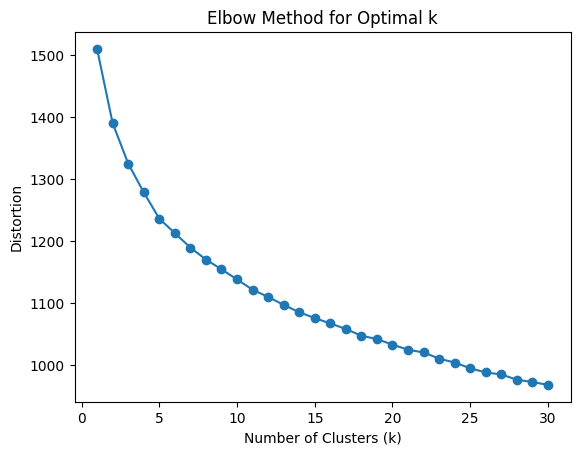

Enter the optimal number of clusters (k): 10


In [2]:
import pandas as pd
import umap
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans

import pandas as pd
import umap
import os
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def perfrom_clustering(filepath, max_clusters=30):
    df = pd.read_json(filepath)
    data = df['embedding'].values.tolist()

    # Apply UMAP to reduce dimensionality to 2D
    umap_model = umap.UMAP(n_components=2)
    umap_result = umap_model.fit_transform(data)

    # Apply KMeans clustering to the UMAP-transformed data
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plot the elbow method to determine the optimal number of clusters
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.show()

    # Let the user choose the optimal k based on the elbow plot
    num_clusters = int(input("Enter the optimal number of clusters (k): "))

    # Perform KMeans clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)

    # Create a DataFrame for Plotly with UMAP coordinates and KMeans labels
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df['Cluster'] = kmeans_labels

    # Plot the 2D UMAP representation with colored clusters using Plotly
    fig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='Cluster',
                     title='UMAP Visualization with KMeans Clusters')
    fig.show()

    df['label'] = df['pred'] = kmeans_labels
    save_path = os.path.join('./clustering_roi/',filepath.split('/')[-1])
    df.to_json(save_path, orient='records')

filepath = './embeddings/embeddings_cropped/hardtail_cv_Feburary_2023_set2-1_train_cropped.json'
perfrom_clustering(filepath)

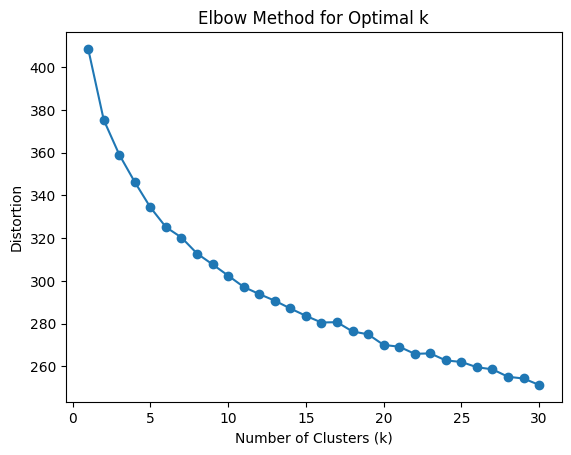

Enter the optimal number of clusters (k): 10


In [3]:
filepath = './embeddings/embeddings_cropped/hardtail_cv_Feburary_2023_set2-1_valid_cropped.json'
perfrom_clustering(filepath)

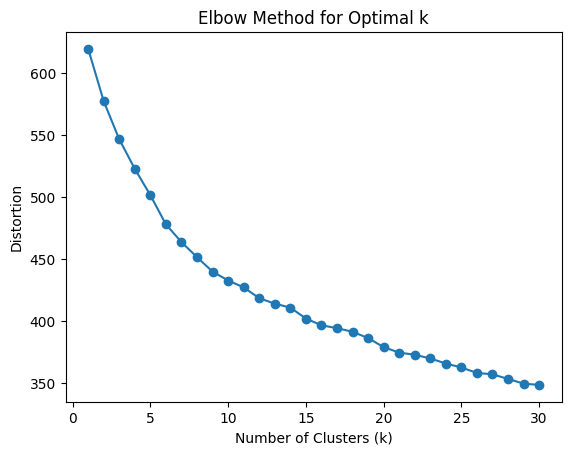

Enter the optimal number of clusters (k): 9


In [4]:
filepath = './embeddings/embeddings_cropped/hardtail_cv_april_2023-4_train_cropped.json'
perfrom_clustering(filepath)

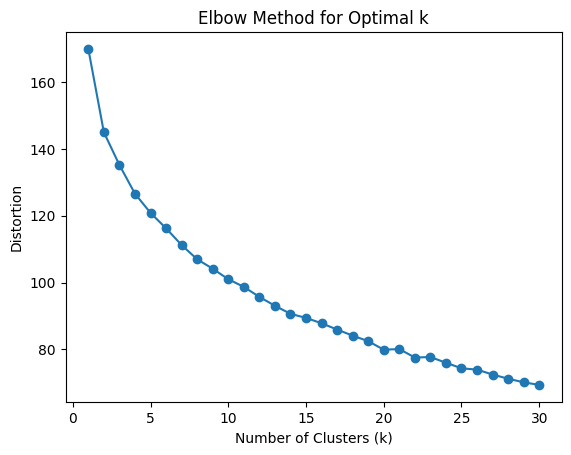

Enter the optimal number of clusters (k): 6


In [5]:
filepath = './embeddings/embeddings_cropped/hardtail_cv_april_2023-4_valid_cropped.json'
perfrom_clustering(filepath)

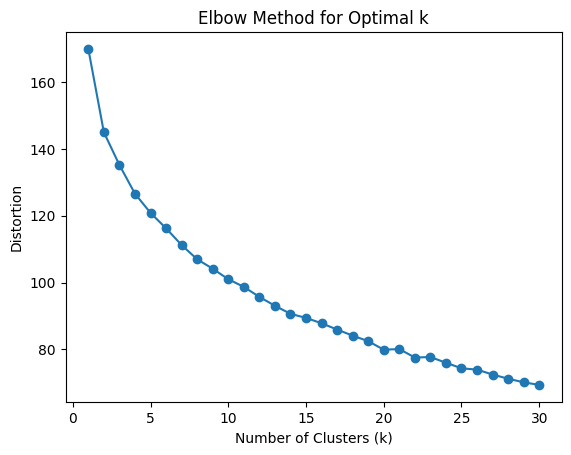

Enter the optimal number of clusters (k): 6


In [6]:
filepath = './embeddings/embeddings_cropped/hardtail_cv_april_2023-4_valid_cropped.json'
perfrom_clustering(filepath)

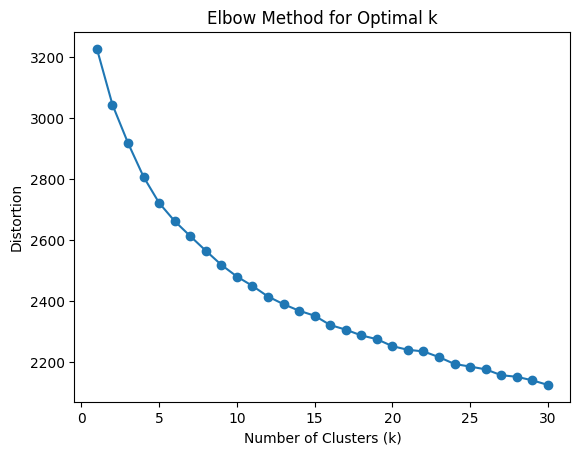

Enter the optimal number of clusters (k): 6


In [7]:
filepath = './embeddings/embeddings_cropped/hardtail_cv_february_2023-13_train_cropped.json'
perfrom_clustering(filepath)

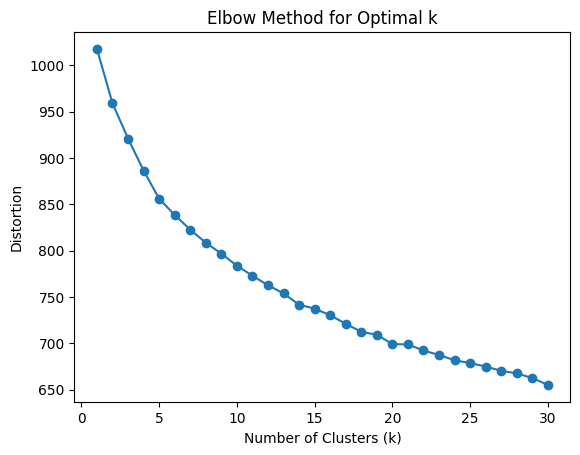

Enter the optimal number of clusters (k): 5


In [8]:
filepath = './embeddings/embeddings_cropped/hardtail_cv_february_2023-13_valid_cropped.json'
perfrom_clustering(filepath)